In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('/home/moglix/Downloads/Country-data.csv')


In [3]:
data.shape

(167, 10)

In [4]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


***Explotary Data Analysis***

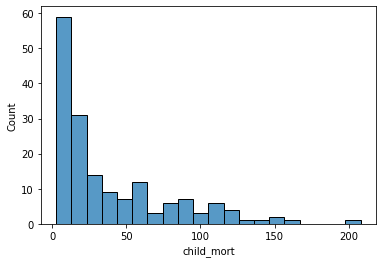

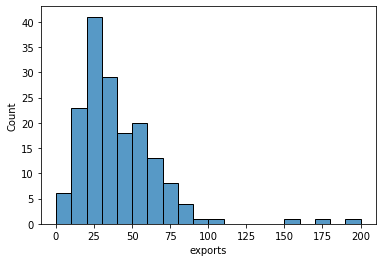

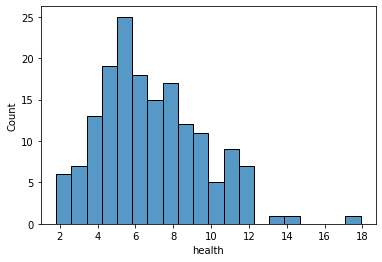

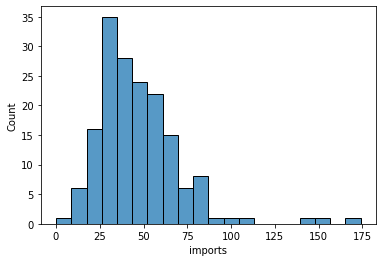

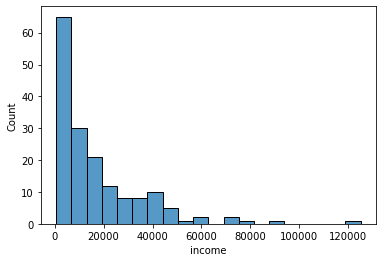

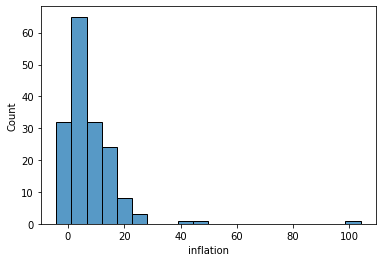

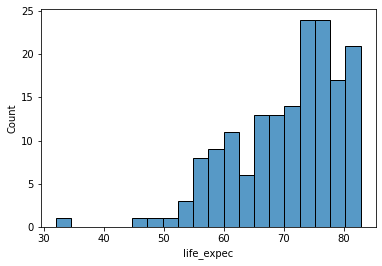

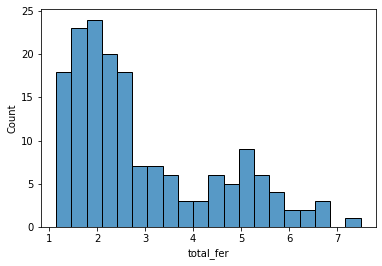

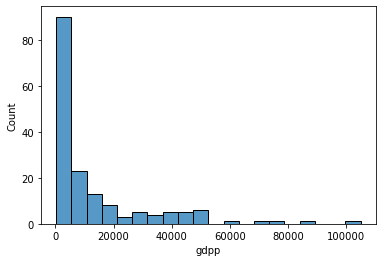

In [5]:
for feature in data.columns :
    if feature!='country' :
        sns.histplot(data[feature],bins=20)
        plt.show()

/home/moglix/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


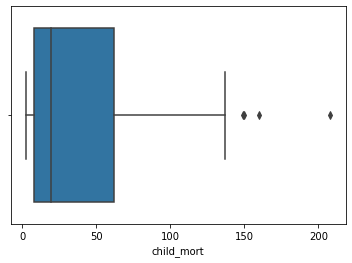

/home/moglix/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


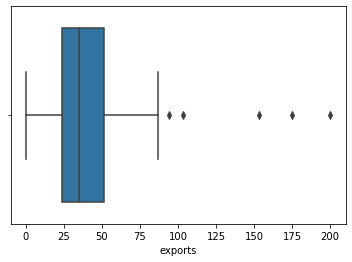

/home/moglix/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


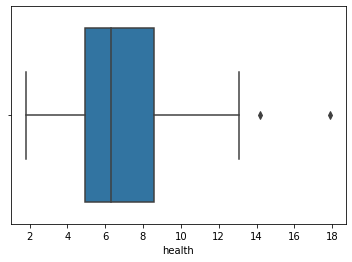

/home/moglix/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


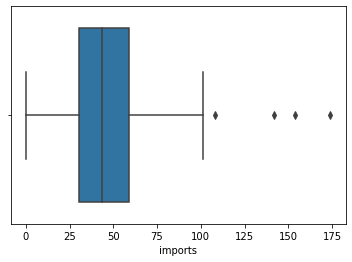

/home/moglix/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


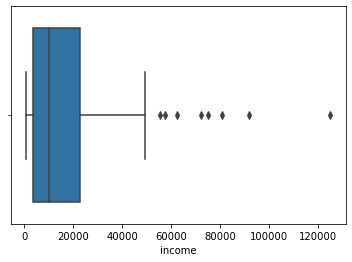

/home/moglix/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


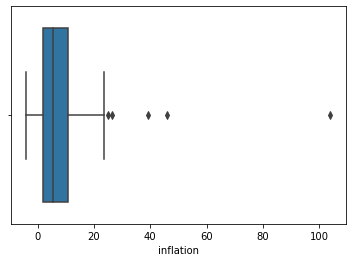

/home/moglix/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


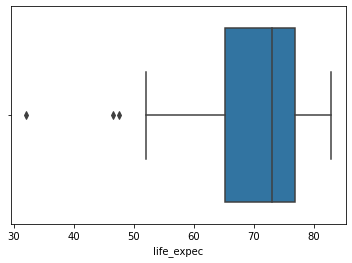

/home/moglix/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


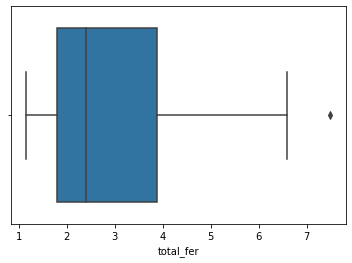

/home/moglix/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


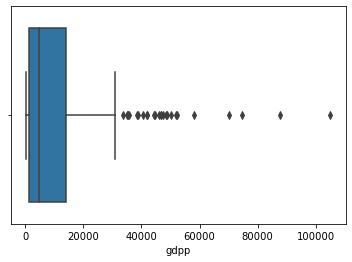

In [6]:
for feature in data.columns :
    if feature!='country' :
        sns.boxplot(data[feature])
        plt.show()

<AxesSubplot:xlabel='income', ylabel='imports'>

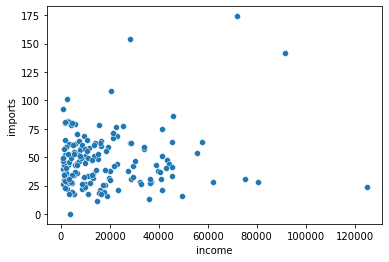

In [7]:
sns.scatterplot(x='income',y='imports',data=data)

<AxesSubplot:xlabel='income', ylabel='gdpp'>

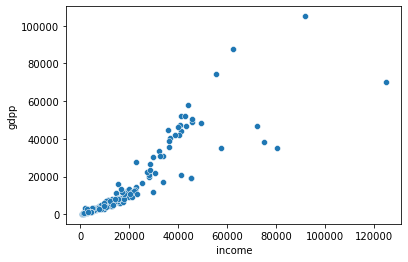

In [8]:
 sns.scatterplot(x='income',y='gdpp',data=data)

<AxesSubplot:xlabel='income', ylabel='exports'>

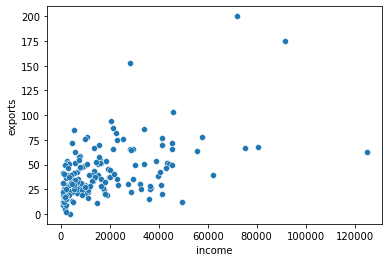

In [9]:
sns.scatterplot(x='income',y='exports',data=data)

<AxesSubplot:>

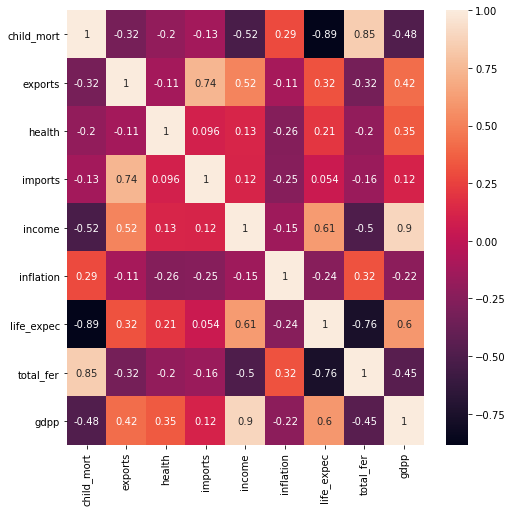

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)

**Observations**

1. Data has outliers.

2. Data is right skewed and need to  be scaled .

3. There  is very high realtion between some columns need to be removed.

4. The increase in income showed increase in gdpp.

***Data Preprocessing***

In [11]:
df=data['country']

In [12]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
data['country']=encoder.fit_transform(data['country'])
data_h=data.copy()

In [13]:
# removing higly correlated columns 
data.drop('gdpp',axis=1,inplace=True)
data.drop('child_mort',axis=1,inplace=True)
data.head()

,country,exports,health,imports,income,inflation,life_expec,total_fer
0,0,10.0,7.58,44.9,1610,9.44,56.2,5.82
1,1,28.0,6.55,48.6,9930,4.49,76.3,1.65
2,2,38.4,4.17,31.4,12900,16.10,76.5,2.89
3,3,62.3,2.85,42.9,5900,22.40,60.1,6.16
4,4,45.5,6.03,58.9,19100,1.44,76.8,2.13


In [14]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=data.income.quantile(0.75)-data.income.quantile(0.25)
lower_bridge=data['income'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['income'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-25812.5
51967.5


(None, None)

/home/moglix/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income'>

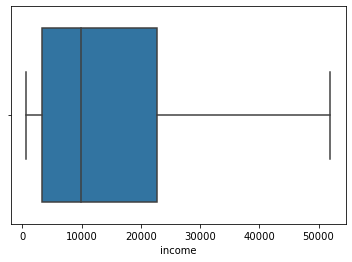

In [15]:
data.loc[data['income']>=51967,'income']=51967
sns.boxplot(data['income'])

****Standarad Scaler does not perform well with outliers so outliers handled****

In [16]:
scaler = preprocessing.StandardScaler()

In [17]:
scaled_data= pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
scaled_data

,country,exports,health,imports,income,inflation,life_expec,total_fer
0,-1.721710,-1.138280,0.279088,-0.082455,-0.943938,0.157336,-1.619092,1.902882
1,-1.700967,-0.479658,-0.097016,0.070837,-0.395181,-0.312347,0.647866,-0.859973
2,-1.680223,-0.099122,-0.966073,-0.641762,-0.199290,0.789274,0.670423,-0.038404
3,-1.659480,0.775381,-1.448071,-0.165315,-0.660985,1.387054,-1.179234,2.128151
4,-1.638736,0.160668,-0.286894,0.497568,0.209639,-0.601749,0.704258,-0.541946
...,...,...,...,...,...,...,...,...
162,1.638736,0.200917,-0.571711,0.240700,-0.855556,-0.489784,-0.852161,0.365754
163,1.659480,-0.461363,-0.695862,-1.213499,0.038152,3.616865,0.546361,-0.316678
164,1.680223,1.130305,0.008877,1.380030,-0.753983,0.409732,0.286958,-0.661206
165,1.700967,-0.406478,-0.597272,-0.517472,-0.754643,1.500916,-0.344633,1.140944


**K Means Clustering**

 Depict  k value from elbow method  

In [18]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_data)
    Sum_of_squared_distances.append(km.inertia_)

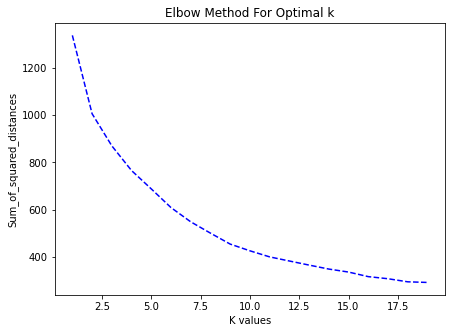

In [19]:
plt.figure(figsize=(7, 5))
plt.plot(range(1,20), Sum_of_squared_distances, 'b--')
plt.xlabel('K values')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


Silhouette score for k= 2


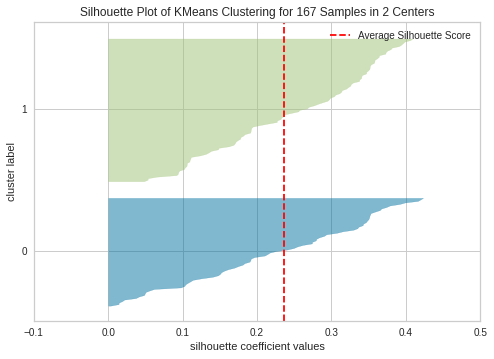

Silhouette score for k= 3


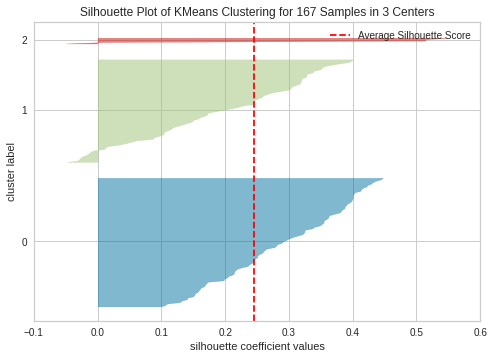

Silhouette score for k= 4


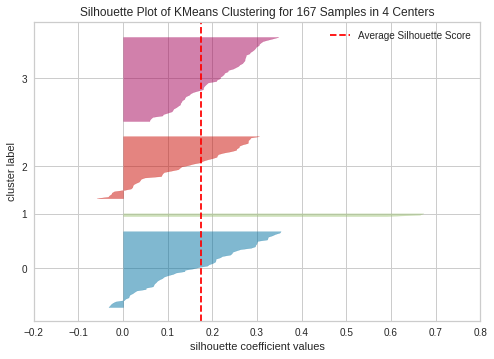

Silhouette score for k= 5


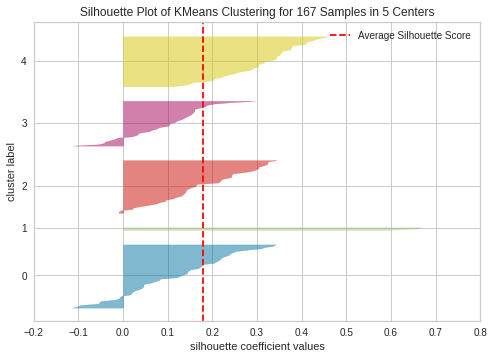

Silhouette score for k= 6


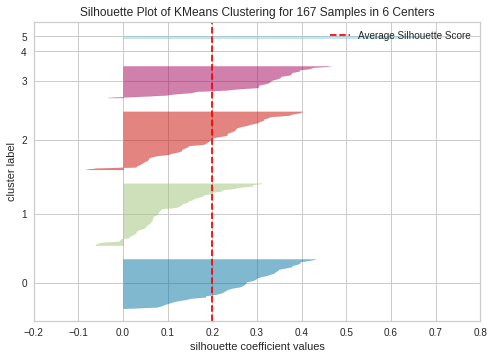

Silhouette score for k= 7


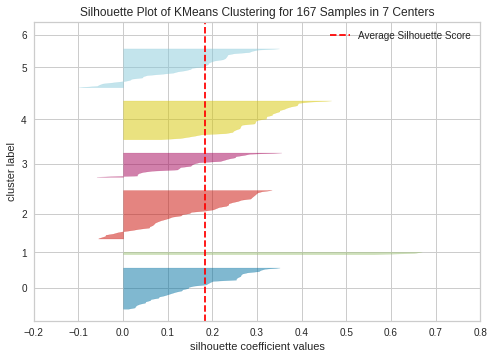

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer
for i in [2,3,4,5,6,7]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    print("Silhouette score for k= "+str(i))
    visualizer.fit(scaled_data) 
    visualizer.show()


**According to elbow method and silhouette visualization k=2 is considered optimal value with good silhouette score**

In [21]:
from sklearn.metrics  import silhouette_score
for i in [2,3,4,5,6,7] :
    cluster = KMeans(n_clusters=i,random_state=42)
    cluster_labels = cluster.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, cluster_labels)
    print("Score for k= {} is {}".format(i,score))

Score for k= 2 is 0.23682391847661025
Score for k= 3 is 0.2458408510137771
Score for k= 4 is 0.17536801137637603
Score for k= 5 is 0.17877838632998191
Score for k= 6 is 0.20005344879293932
Score for k= 7 is 0.1837264464635956


In [22]:
cluster = KMeans(n_clusters=2)
cluster_labels = cluster.fit_predict(scaled_data)

In [23]:
cluster.cluster_centers_

array([[-0.06834436,  0.29127521,  0.22908193,  0.11784904,  0.55985049,
        -0.28650762,  0.69642291, -0.68226854],
       [ 0.09017658, -0.38432146, -0.30226087, -0.15549526, -0.73869162,
         0.37803089, -0.91889134,  0.90021544]])

In [24]:
scaled_data['clusters']=cluster_labels
scaled_data.head()

,country,exports,health,imports,income,inflation,life_expec,total_fer,clusters
0,-1.721710,-1.138280,0.279088,-0.082455,-0.943938,0.157336,-1.619092,1.902882,1
1,-1.700967,-0.479658,-0.097016,0.070837,-0.395181,-0.312347,0.647866,-0.859973,0
2,-1.680223,-0.099122,-0.966073,-0.641762,-0.199290,0.789274,0.670423,-0.038404,0
3,-1.659480,0.775381,-1.448071,-0.165315,-0.660985,1.387054,-1.179234,2.128151,1
4,-1.638736,0.160668,-0.286894,0.497568,0.209639,-0.601749,0.704258,-0.541946,0


**Visualizing**

As we have 10 features we cannot plot them on graph to see clusters so we need to do Principal component Analysis to convert 10 features to 2 features to be plotted on 2-D graph

In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [26]:
reduced_data=pd.DataFrame(pca.fit_transform(scaled_data),columns=['PCA1','PCA2'])

In [27]:
reduced_data['cluster']=cluster_labels 

In [28]:
reduced_data.shape

(167, 3)

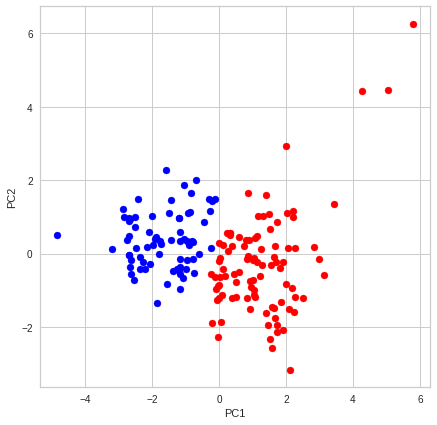

In [29]:
plt.figure(figsize=(7,7))

plt.scatter(reduced_data[reduced_data['cluster'] == 0].loc[:, 'PCA1'], reduced_data[reduced_data['cluster'] == 0].loc[:, 'PCA2'], color='red')
plt.scatter(reduced_data[reduced_data['cluster'] == 1].loc[:, 'PCA1'], reduced_data[reduced_data['cluster'] == 1].loc[:, 'PCA2'], color='blue')
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

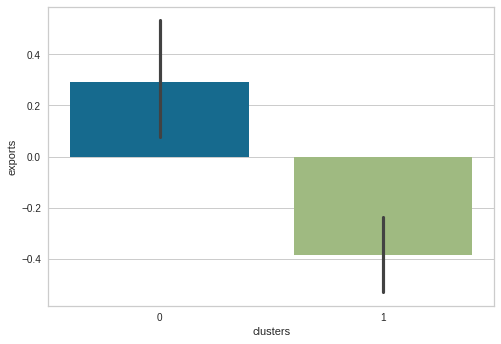

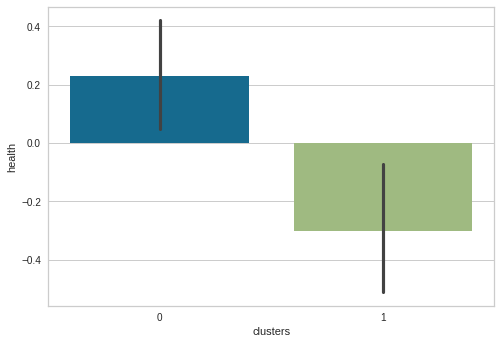

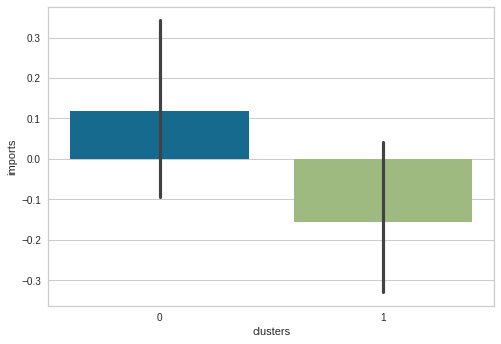

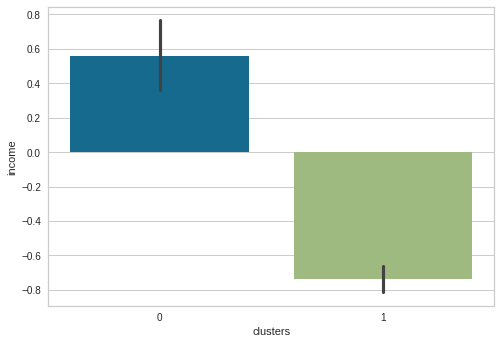

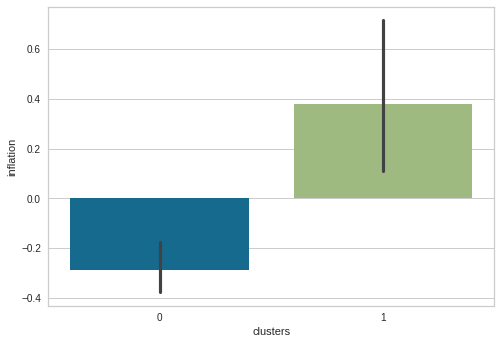

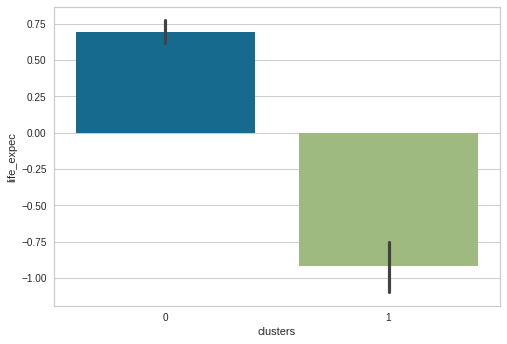

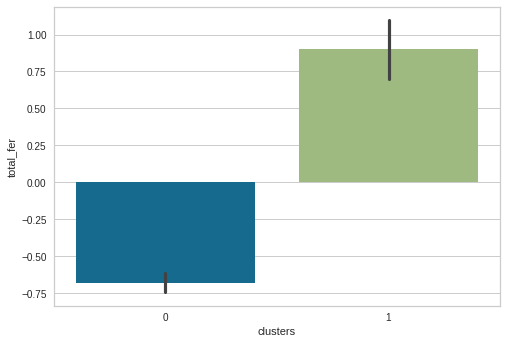

In [30]:
for feature in scaled_data :
    if feature!='country' and feature!='clusters':
        sns.barplot(x='clusters',y=feature,data=scaled_data)
        plt.show()

**Observations**

1. The countries in cluster 1 is having high child_mort.

2. The countries in cluster 1 is having low  gdpp and low income.



In [31]:
data_ff={'country':np.array(df),'cluster':np.array(scaled_data['clusters'])}
country=pd.DataFrame(data=data_ff)

In [32]:
country

,country,cluster
0,Afghanistan,1
1,Albania,0
2,Algeria,0
3,Angola,1
4,Antigua and Barbuda,0
...,...,...
162,Vanuatu,1
163,Venezuela,1
164,Vietnam,0
165,Yemen,1


In [37]:
countries=country[country['cluster']==1]

In [38]:
countries

,country,cluster
0,Afghanistan,1
3,Angola,1
12,Bangladesh,1
17,Benin,1
19,Bolivia,1
...,...,...
161,Uzbekistan,1
162,Vanuatu,1
163,Venezuela,1
165,Yemen,1


**Hierarchical Clustering**

In [47]:
data_red=reduced_data.copy()
data_red.drop('cluster',axis=1,inplace=True)

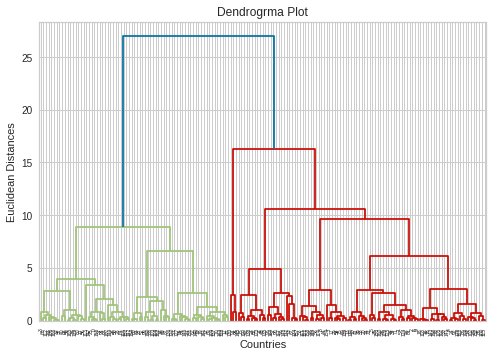

In [48]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(data_red, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Countries")  
plt.show()  

Based on dendogram i choosed 2 cluster

In [49]:
from sklearn.cluster import AgglomerativeClustering  
hc=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

In [50]:
 hc.fit_predict(data_red)  

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1])

In [54]:
data_red['cluster']=hc.labels_
data_red.head()

,PCA1,PCA2,cluster
0,-2.680723,-0.050428,1
1,0.509127,-0.783146,0
2,-0.251542,-0.570416,0
3,-2.409548,1.491921,1
4,1.036679,-0.115074,0


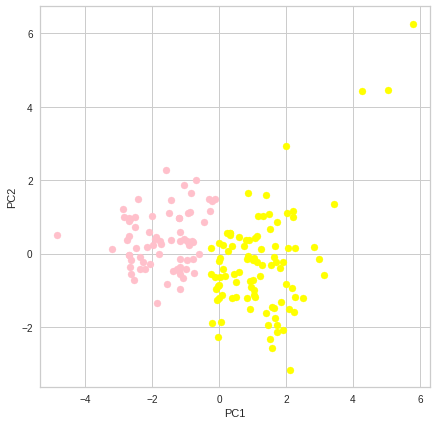

In [55]:
plt.figure(figsize=(7,7))

plt.scatter(data_red[data_red['cluster'] == 0].loc[:, 'PCA1'], data_red[data_red['cluster'] == 0].loc[:, 'PCA2'], color='yellow')
plt.scatter(data_red[data_red['cluster'] == 1].loc[:, 'PCA1'], data_red[data_red['cluster'] == 1].loc[:, 'PCA2'], color='pink')
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

***From both the clusters w ecan suggest country names to be laid more focus on for providing aid.***